In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#tại sao điểm thi lại cao
# đề thi?
# phổ điểm?
# số lượng thí sinh?
# xu hướng phát triển của môn học?

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read file data
df = pd.read_csv('/content/drive/MyDrive/Coblab/hometest/sample.txt')
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.shape

(4936983, 14)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(4932392, 14)

# **TỐC ĐỘ TĂNG TRƯỞNG THÍ SINH QUA CÁC  NĂM**
2020 do covid nên nhiều thí sinh k thể đi thi.

năm 2024 số lưojng thí sinh tăng
... so với 2023...

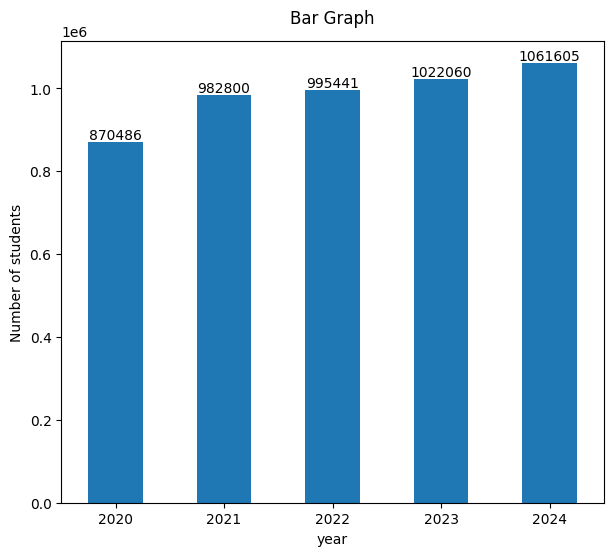

In [ ]:
year_counts = df['year'].value_counts().sort_index(ascending=True)
ax = year_counts.plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("year")
plt.ylabel("Number of students")
plt.title("Bar Graph", y = 1.02)
# Add labels to each bar
for i, value in enumerate(year_counts):
    ax.text(i, value, str(value), ha='center', va='bottom')


## **Số lượng thí sinh thi các môn năm 2024**

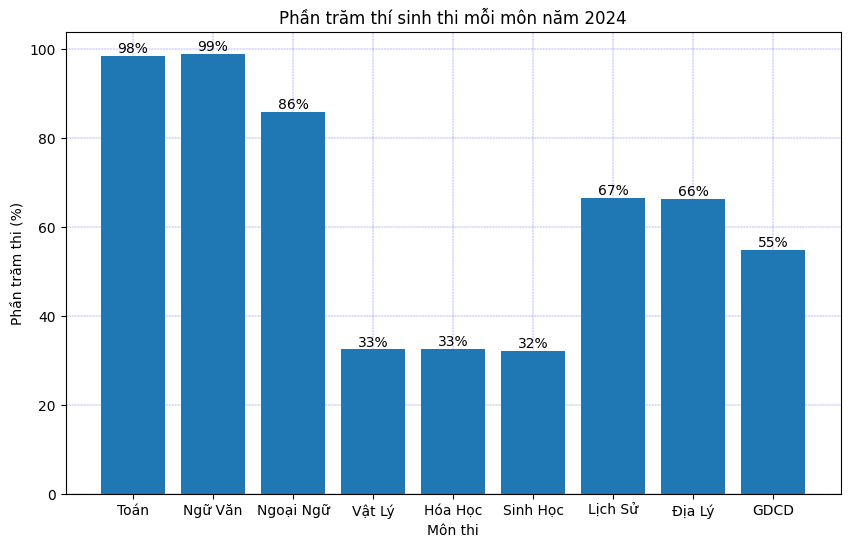

In [ ]:
# Kiểm tra số học sinh thi mỗi môn
df_24 = df[df['year']==2024]
toan = df_24[df_24['toan'] >= 0].count()['toan']
ngu_van = df_24[df_24['ngu_van'] >= 0].count()['ngu_van']
ngoai_ngu = df_24[df_24['ngoai_ngu'] >= 0].count()['ngoai_ngu']
vat_li = df_24[df_24['vat_li'] >= 0].count()['vat_li']
hoa_hoc = df_24[df_24['hoa_hoc'] >= 0].count()['hoa_hoc']
sinh_hoc = df_24[df_24['sinh_hoc'] >= 0].count()['sinh_hoc']
lich_su = df_24[df_24['lich_su'] >= 0].count()['lich_su']
dia_li = df_24[df_24['dia_li'] >= 0].count()['dia_li']
gdcd = df_24[df_24['gdcd'] >= 0].count()['gdcd']

tong_thi_sinh = df_24.count()['sbd']

# Các môn thi
subject = ['Toán', 'Ngữ Văn', 'Ngoại Ngữ', 'Vật Lý', 'Hóa Học', 'Sinh Học', 'Lịch Sử', 'Địa Lý',  'GDCD']

# Số thí sinh thi mỗi môn
no_of_stu = [toan, ngu_van, ngoai_ngu, vat_li, hoa_hoc, sinh_hoc, lich_su, dia_li, gdcd]

# Phần trăm thí sinh thi mỗi môn
ptram_thi = no_of_stu / tong_thi_sinh

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

ax1.bar(subject, ptram_thi * 100)
ax1.set_xlabel('Môn thi')
ax1.set_ylabel('Phần trăm thi (%)')
ax1.grid(color='b', ls='-.', lw = 0.2)
ax1.set_axisbelow(True)

for i, value in enumerate(ptram_thi * 100):
    ax1.text(i, value, str(round(value)) + '%', ha='center', va='bottom')
plt.title('Phần trăm thí sinh thi mỗi môn năm 2024')
plt.show()

tỉ lệ này tương tự trong các năm 2020,2021,2022,2023
gần 100% thí sinh chọn thi văn, tiếp theo là toán và anh.

Thí sinh chọn thi các môn lý, hóa, sinh thấp hơn các môn còn lại.
Câu hỏi đặt ra là: tại sao thí sinh lại ưu tiên chọn các môn sử, địa, gdcd hơn là lí, hóa sinh :D

## **Phân bổ điểm phổ biến từng môn theo biểu đồ HISTOGRAM**



**Điểm môn Toán trong 5 năm qua có sự phẩn bổ khá giống nhau, giá trị xuất hiện nhiều nhất là 7,8. Đường lên cũng dốc mà đường xuống còn dốc hơn. Điều này cho thấy trong 5 năm qua độ khó của các câu hỏi chỉ nằm ở 2 thái cực: cực dễ và cực khó. Lấy được điểm 7 không phải là điều khó khăn, nhưng để đạt điểm 10 là vô cùng khó cho các thí sinh.**

<Axes: xlabel='toan', ylabel='Density'>

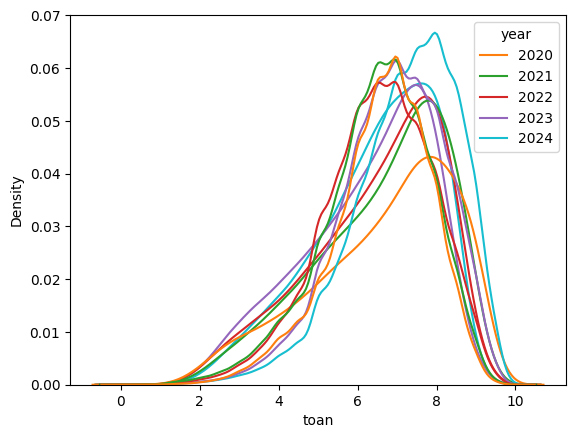

In [ ]:
# Compare math between 5 years
sns.kdeplot(data=df, x='toan', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

**Với môn Văn: Điểm yếu vị (giá trị xuất hiện nhiều nhất) của năm 2024 là 8, cao hơn rõ rệt so với các năm trước(các năm trước tương đối ổn định với điểm yếu vị = 7). Điều đó cho thấy đề văn cũng như barem chấm điểm văn năm nay có vẻ dễ thở hơn các năm trước**



<Axes: xlabel='ngu_van', ylabel='Density'>

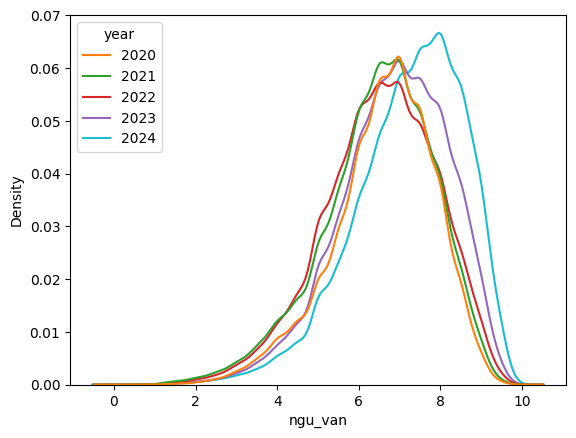

In [ ]:
sns.kdeplot(data=df, x='toan', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

**Đề thi tiếng Anh năm 2021 gây rất nhiều tranh cãi trên báo chí và truyền thông khi tạo ra một phổ điểm vô cùng bất bình thường. Rút kinh nghiệm từ đó, đề thi từ 2022 đến 2024 tạo ra một phổ điểm bình thường hơn. Và điểm số ngoại ngữ năm 2024 cũng có sự cải thiện hơn so với những năm trước**

<Axes: xlabel='ngoai_ngu', ylabel='Density'>

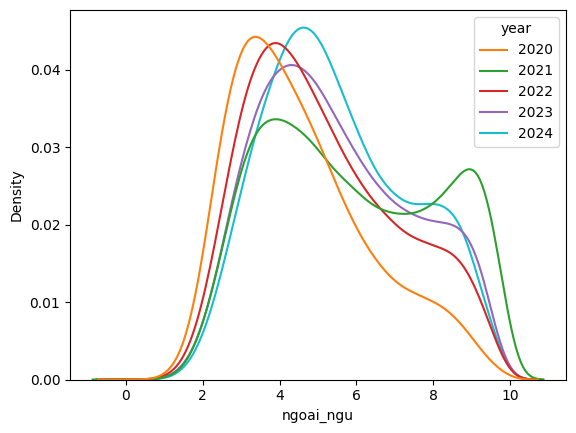

In [ ]:
sns.kdeplot(data=df, x='ngoai_ngu', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

<Axes: xlabel='vat_li', ylabel='Density'>

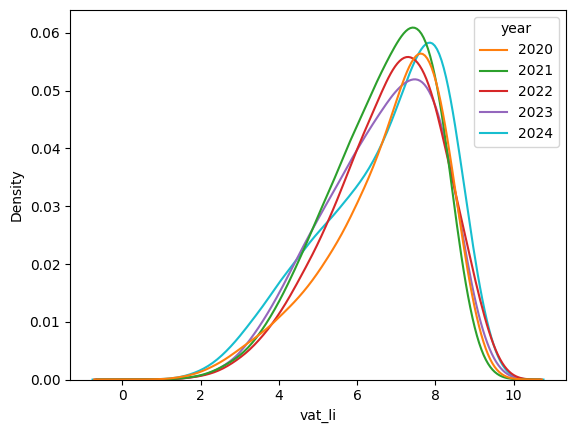

In [ ]:
sns.kdeplot(data=df, x='vat_li', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

<Axes: xlabel='hoa_hoc', ylabel='Density'>

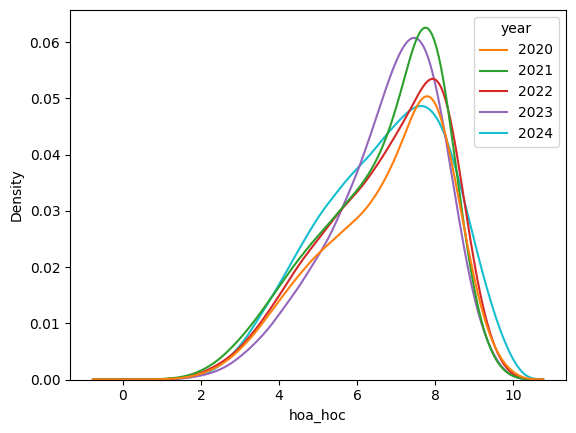

In [ ]:
sns.kdeplot(data=df, x='hoa_hoc', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

<Axes: xlabel='sinh_hoc', ylabel='Density'>

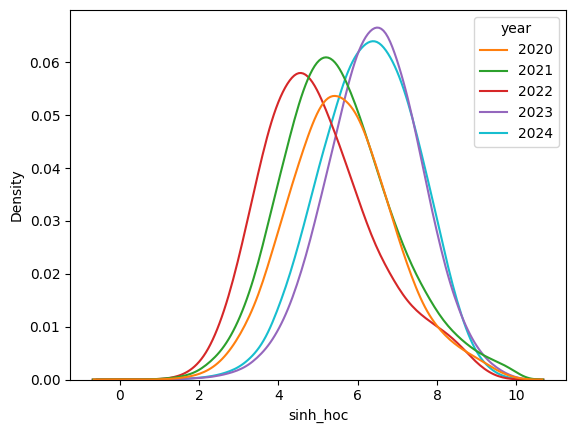

In [ ]:
sns.kdeplot(data=df, x='sinh_hoc', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

<Axes: xlabel='lich_su', ylabel='Density'>

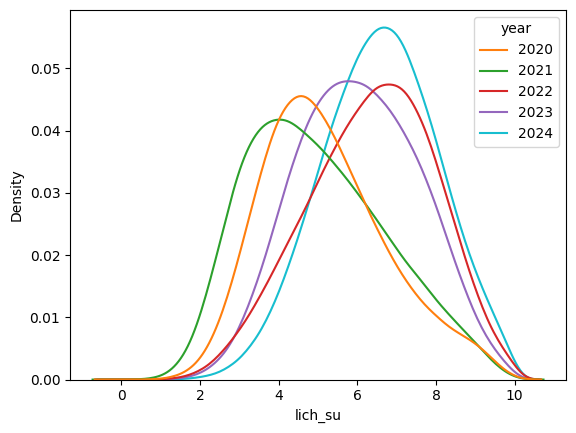

In [ ]:
sns.kdeplot(data=df, x='lich_su', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

điểm yếu vị môn lịch sử tăng đều qua các năm :D học sinh VN ngày càng học giỏi lịch sử , địa lí ha :D

điểm địa lý năm nay rất là tốt so vs các năm còn lại

<Axes: xlabel='dia_li', ylabel='Density'>

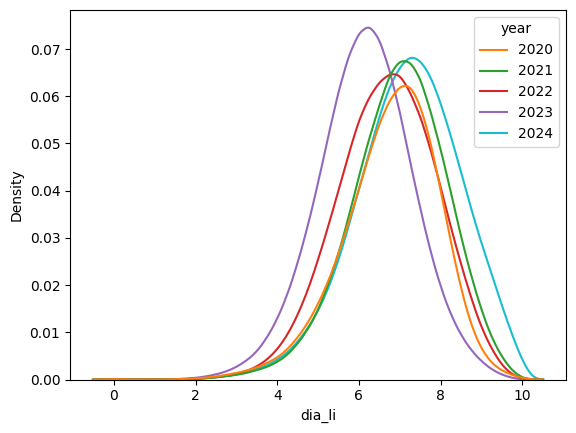

In [ ]:
sns.kdeplot(data=df, x='dia_li', hue='year', bw_adjust=2, palette=["C1", "C2", "C3", "C4", "C9"])

nếu muốn biết với điểm toán của mình được 8 điểm thì mình thuộc top 10% thí sinh xuất sắc nhất trong năm nay hay bn trong năm nay và so sánh với các năm về trước.

Có mean
median
std
percentile

tb năm nay điểm môn Toán tăng 0.2 so với năm ngoái, nhưng không phải là tất cả các phổ điểm đều tăng 0.2 điểm.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0, 0.5, 'toan'),
  Text(0, 1.5, 'ngu_van'),
  Text(0, 2.5, 'ngoai_ngu'),
  Text(0, 3.5, 'vat_li'),
  Text(0, 4.5, 'hoa_hoc'),
  Text(0, 5.5, 'sinh_hoc'),
  Text(0, 6.5, 'lich_su'),
  Text(0, 7.5, 'dia_li'),
  Text(0, 8.5, 'gdcd')])

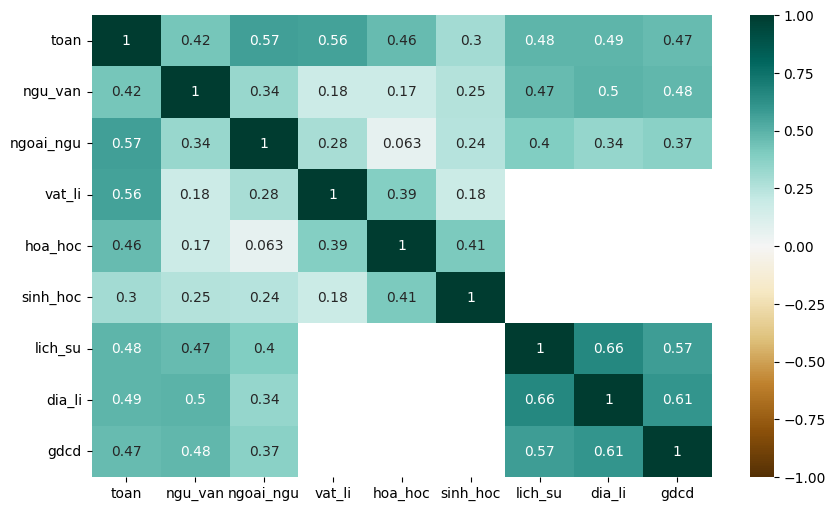

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[df['year'] == 2024][['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc',
       'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.yticks(rotation=0)

toán tương quan vs ngoại ngữ
ngữ văn tương quan vs lịch sử
vạt lý tương quan toán
hóa học tương quan toán
sinh học tương quan hóa học
lịch sử địa lý tương quan

# **Map**

In [ ]:
df_2024 = df[df['year'] == 2024]

In [ ]:
import geopandas as gpd
map_df = gpd.read_file('/content/drive/MyDrive/diemthidaihoc/diaphantinh.geojson')

In [ ]:
# Function to merge map_df
def merge_df(subject_name, map_df, df_2024):
    map_df = map_df.merge(df_2024.groupby('province')[subject_name].mean(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_avg'}, inplace=True)
    map_df = map_df.merge(df_2024.groupby('province')[subject_name].std(), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_std'}, inplace=True)
    map_df = map_df.merge(df_2024.groupby('province')[subject_name].apply(lambda x: (x >= 9).sum()/len(x)), how='left', left_on='ten_tinh', right_on='province')
    map_df.rename(columns={subject_name: subject_name + '_>=9'}, inplace=True)
    return map_df

In [ ]:
for subject_name in ['toan', 'ngu_van', 'ngoai_ngu', 'vat_li', 'hoa_hoc',
       'sinh_hoc', 'lich_su', 'dia_li', 'gdcd']:
    map_df = merge_df(subject_name, map_df, df_2024)


In [ ]:
map_df['year']

KeyError: 'year'

<Axes: >

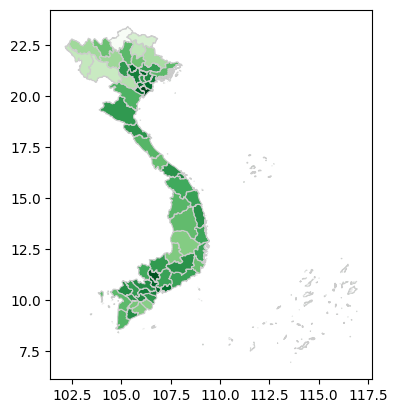

In [ ]:
map_df.plot(column='toan_avg', cmap='Greens', linewidth=0.8, edgecolor='0.8')


<Axes: >

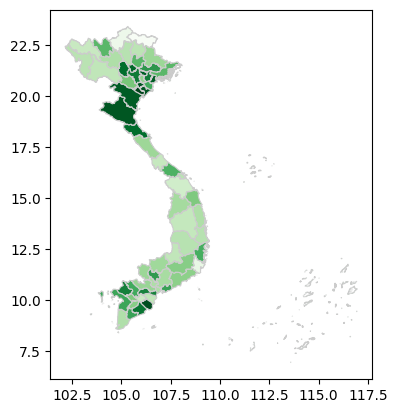

In [ ]:
map_df.plot(column='ngu_van_avg', cmap='Greens', linewidth=0.8, edgecolor='0.8')


<Axes: >

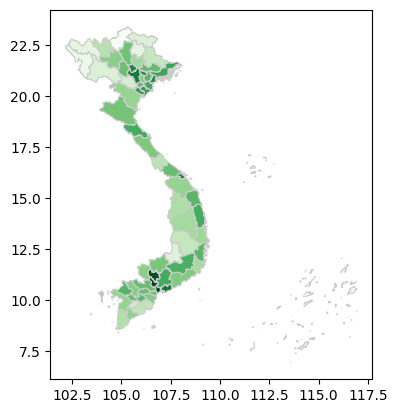

In [ ]:
map_df.plot(column='ngoai_ngu_avg', cmap='Greens', linewidth=0.8, edgecolor='0.8')

<Axes: >

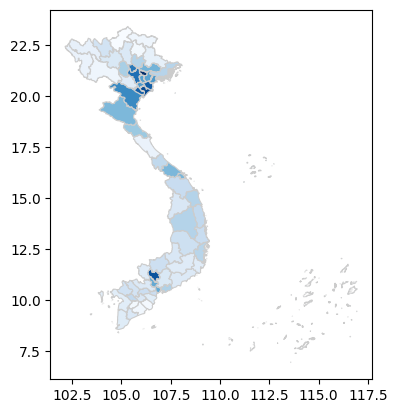

In [ ]:
map_df.plot(column='toan_>=9', cmap='Blues', linewidth=0.8, edgecolor='0.8')

<Axes: >

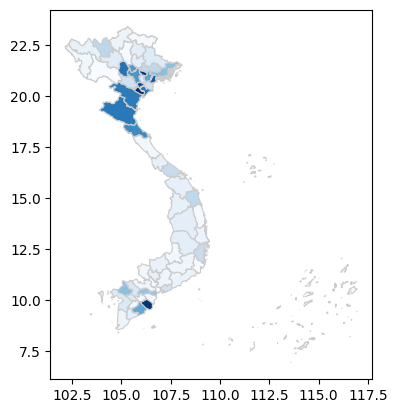

In [ ]:
map_df.plot(column='ngu_van_>=9', cmap='Blues', linewidth=0.8, edgecolor='0.8')

<Axes: >

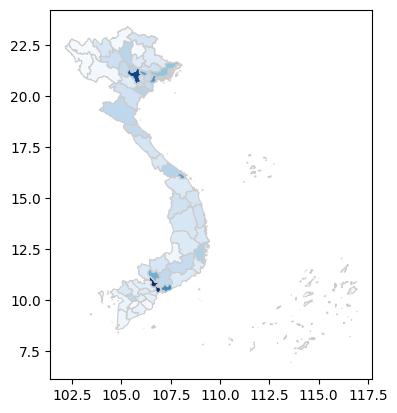

In [ ]:
map_df.plot(column='ngoai_ngu_>=9', cmap='Blues', linewidth=0.8, edgecolor='0.8')